In [9]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
print(tf.__version__)

2.15.0


Load and preparation of data

In [3]:
tf_fashionmnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = tf_fashionmnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [11]:
index = 53
np.set_printoptions(linewidth = 320)
print(f'Label: {train_labels[index]}')
print(f'\n Image pixel array: \n {train_images[index]}')

Label: 2

 Image pixel array: 
 [[  0   0   0   0   0   0   0   0   0   0  93 173 136  77  53  73 152 131  10   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0  74 219 255 255 244 255 238 188 255 250 249 255 252 139   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0 141 255 255 247 240 241 233 221 211 237 236 241 244 250 255 211   3   0   0   0   0   0]
 [  0   0   0   0   0  14 249 245 242 244 245 244 247 250 253 245 245 242 242 243 239 255 177   0   0   0   0   0]
 [  0   0   0   0   0  83 255 241 245 246 246 243 241 243 242 243 245 255 255 244 246 245 238   6   0   0   0   0]
 [  0   0   0   0   0 138 255 240 246 246 245 244 243 243 245 243 254 202 215 251 243 243 253  28   0   0   0   0]
 [  0   0   0   0   0 172 255 240 246 245 245 244 243 243 244 241 255 160 137 255 238 242 255  72   0   0   0   0]
 [  0   0   0   0   0 197 255 241 245 246 245 244 243 243 245 244 247 252 255 246 242 243 255 118   0   0   0   0]
 [  0   0   0   0   0 206 255 242 246 245 245 24

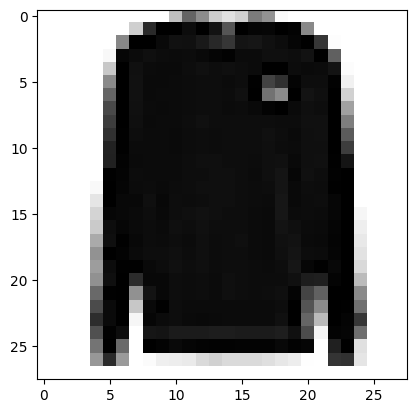

In [12]:
plt.imshow(train_images[index], cmap='Greys')

Normalizing data to make training of the neural network better and the learning process optimized

In [14]:
train_images = train_images / 255.0
test_images = test_images / 255.0

Designing the model
Flatten to make the square into 1 dimension array

In [31]:
model = tf.keras.Sequential([tf.keras.layers.Flatten(),
                             tf.keras.layers.Dense(512, activation = tf.nn.relu),
                             tf.keras.layers.Dense(10, activation = tf.nn.softmax)])

In [32]:
inputs = np.array([[1.0, 3.0, 4.0, 2.0]])
inputs = tf.convert_to_tensor(inputs)
print(f'input to softmax function: {inputs.numpy()}')

outputs = tf.keras.activations.softmax(inputs)
print(f'output of softmax function: {outputs.numpy()}')

sum = tf.reduce_sum(outputs)
print(f'sum of outputs: {sum}')

prediction = np.argmax(outputs)
print(f'class with highest probability: {prediction}')


input to softmax function: [[1. 3. 4. 2.]]
output of softmax function: [[0.0320586  0.23688282 0.64391426 0.08714432]]
sum of outputs: 1.0
class with highest probability: 2


In [33]:
model.compile(optimizer = tf.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

model.fit(train_images, train_labels, epochs = 4)

Epoch 1/4
1875/1875 [==============================] - 14s 7ms/step - loss: 0.8783 - accuracy: 0.7088
Epoch 2/4
1875/1875 [==============================] - 13s 7ms/step - loss: 0.5482 - accuracy: 0.8045
Epoch 3/4
1875/1875 [==============================] - 13s 7ms/step - loss: 0.4879 - accuracy: 0.8275
Epoch 4/4
1875/1875 [==============================] - 13s 7ms/step - loss: 0.4561 - accuracy: 0.8389


In [34]:
model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.4747 - accuracy: 0.8301


[0.47466129064559937, 0.8300999999046326]